In [33]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [34]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [35]:
y.shape

(70000,)

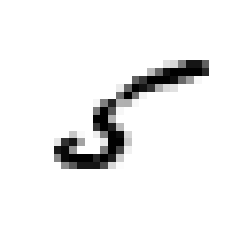

In [50]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


some_digit = X.to_numpy()[11]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [46]:
y[0]

'5'

In [47]:
# To get y as a int because the previous oneis a string
y = y.astype(np.uint8)

In [52]:
y[11]

5

In [51]:
# The MNIST dataset is actually already split into a training set (the first 60,000
# images) and a test set (the last 10,000 images):

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


#Training a Binary Classifier
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])


array([ True])

In [53]:
# Measuring Accuracy Using Cross-Validation
#Let’s use the cross_val_score() function to evaluate your SGDClassifier model
#using K-fold cross-validation, with three folds. Remember that K-fold crossvalidation means splitting the training set into K-folds (in this case, three), then mak‐
#ing predictions and evaluating them on each fold using a model trained on the
#remaining folds

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
# That’s right, it has over 90% accuracy! This is simply because only about 10% of the
# images are 5s, so if you always guess that an image is not a 5, you will be right about
# 90% of the time. Beats Nostradamus.
# This demonstrates why accuracy is generally not the preferred performance measure
# for classifiers, especially when you are dealing with skewed datasets (i.e., when some
# classes are much more frequent than others).



In [54]:
# Confusion Matrix

# To compute the confusion matrix, you first need to have a set of predictions, so they
# can be compared to the actual targets.

# Just like the cross_val_score() function, cross_val_predict() performs K-fold
# cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold


from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [55]:
#Now you are ready to get the confusion matrix using the confusion_matrix() func‐
#tion. Just pass it the target classes (y_train_5) and the predicted classes
#(y_train_pred):

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)


array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [ ]:
#Each row in a confusion matrix represents an actual class, while each column represents a predicted class. The first row of this matrix considers non-5 images (the nega‐
#tive class): 53,057 of them were correctly classified as non-5s (they are called true
#negatives), while the remaining 1,522 were wrongly classified as 5s (false positives).
#The second row considers the images of 5s (the positive class): 1,325 were wrongly
#classified as non-5s (false negatives), while the remaining 4,096 were correctly classi‐
#fied as 5s (true positives). A perfect classifier would have only true positives and true
#negatives, so its confusion matrix would have nonzero values only on its main diago‐
#nal (top left to bottom right)

In [56]:
# Evaluation Metrics
#𝑝𝑟𝑒𝑐𝑖𝑠𝑖on = TP/(TP + FP)
#recall = TP/(TP + FN)

from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)


0.8370879772350012

In [59]:
recall_score(y_train_5, y_train_pred)


0.6511713705958311

In [61]:
# As a result, the classifier will only get a high F1 score if both recall and precision are high.
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)


0.7325171197343846